   ##                               Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("F:/Codes/Dataset/Data Files/1. ST Academy - Crash course and Regression files/House_Price_preprocessed.csv", header=0)

## Single variable regression

In [3]:
y = df["price"]

In [4]:
X = df[['room_num']]

In [5]:
lm = LinearRegression()

fit() will find the parameters of the regression. Its usually run on the training data

In [6]:
lm.fit(X,y)

LinearRegression()

In [7]:
print(lm.intercept_, lm.coef_)

-34.659243123097184 [9.09966966]


predict is run on the test data or new data on the calculated model

In [8]:
lm.predict(X)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

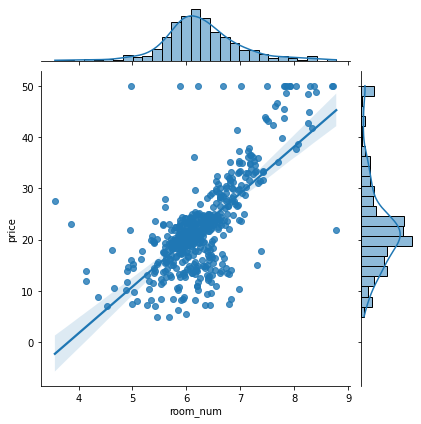

In [9]:
sns.jointplot(x=df['room_num'],
             y=df['price'],
             data=df,
             kind='reg')

## Regression on multiple variables

In [10]:
X_multi = df.drop('price',axis=1)

In [11]:
X_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                506 non-null    int64  
 1   crime_rate                506 non-null    float64
 2   resid_area                506 non-null    float64
 3   air_qual                  506 non-null    float64
 4   room_num                  506 non-null    float64
 5   age                       506 non-null    float64
 6   teachers                  506 non-null    float64
 7   poor_prop                 506 non-null    float64
 8   n_hos_beds                506 non-null    float64
 9   n_hot_rooms               506 non-null    float64
 10  rainfall                  506 non-null    int64  
 11  parks                     506 non-null    float64
 12  avg_dist                  506 non-null    float64
 13  airport_YES               506 non-null    int64  
 14  waterbody_

In [12]:
y_multi = df['price']

In [13]:
lm2 = LinearRegression()

In [14]:
lm2.fit(X_multi, y_multi)

LinearRegression()

In [15]:
print(lm2.intercept_,lm2.coef_)

-7.0001641940148325 [-9.25994825e-05  3.93884459e-02 -4.24515496e-02 -2.08453566e+01
  4.01517484e+00 -5.63796995e-03  1.01089570e+00 -5.79252244e-01
  3.40616274e-01  8.76511361e-02  1.63294871e-02  5.92260263e+01
 -1.21655373e+00  1.11158902e+00  2.57228230e-01 -6.85471640e-01
 -2.76824724e-01]


## Test-Train split

We arent interested in training mse. We want to maximise the accuracy when we apply we apply our model on unseen data. i.e test data

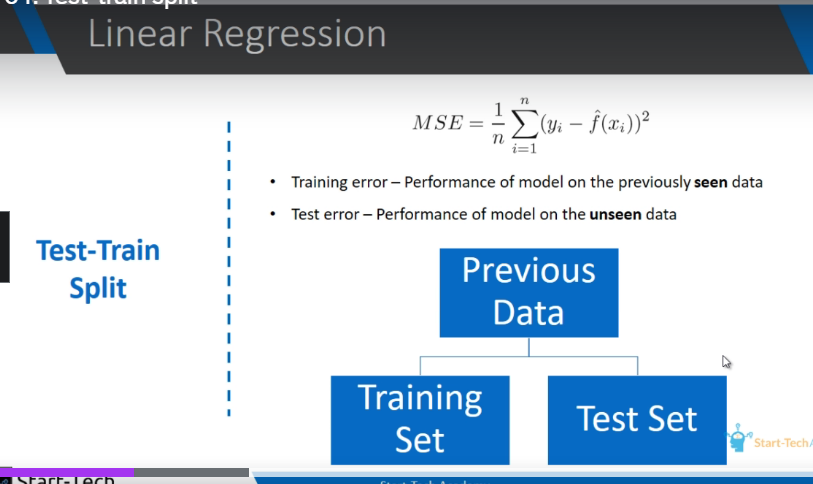

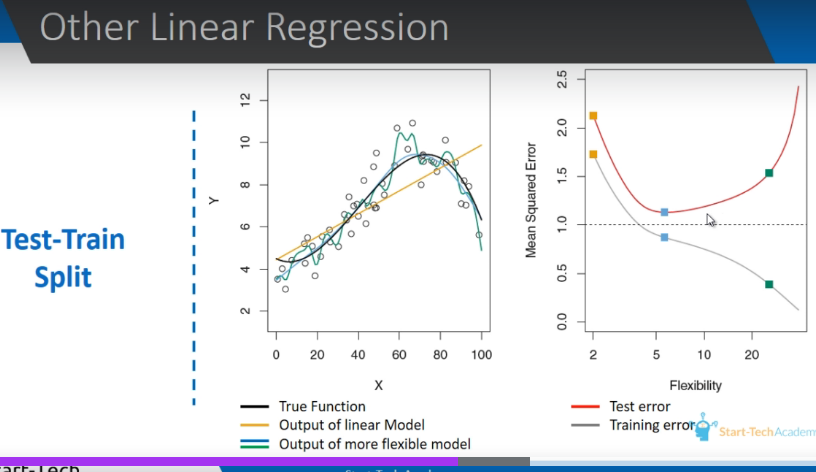

We need to reach the minimum point of test error.

## Test train split techniques

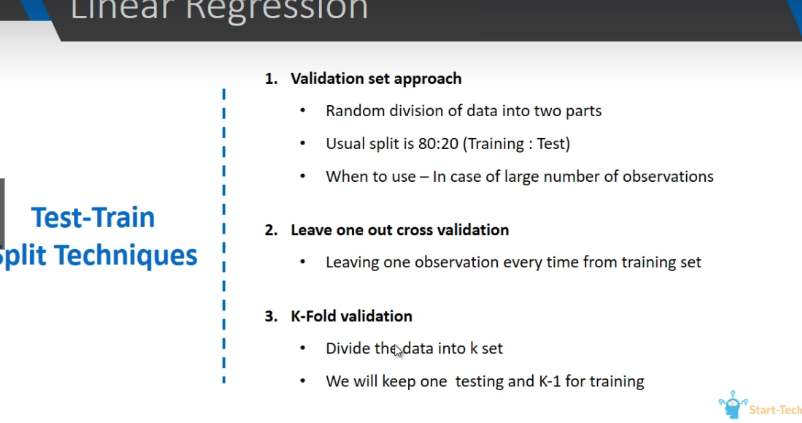

## Bias-variance trade off

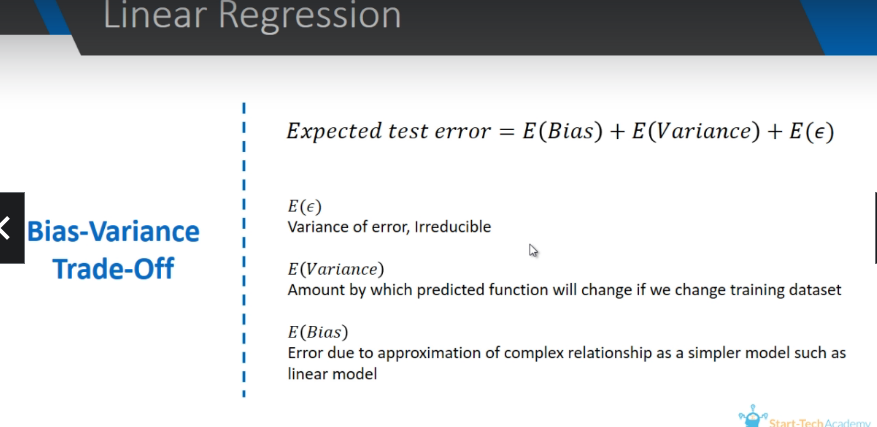

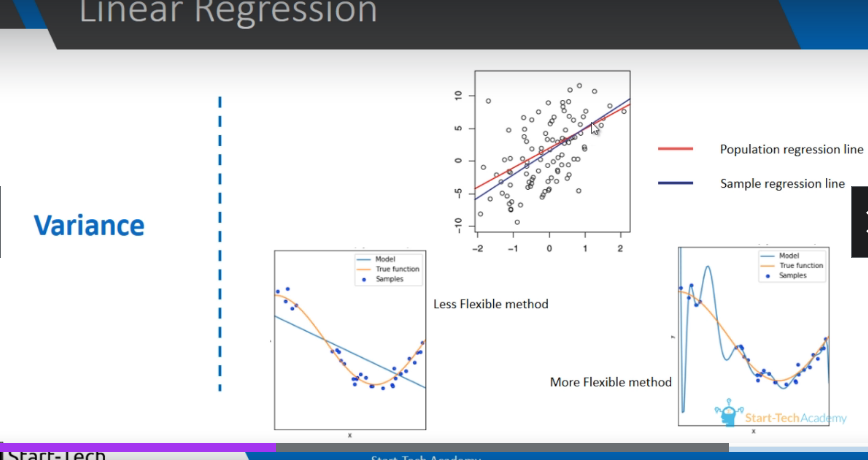

Variance is high for more flexible method, while bias is low for more flexible method.

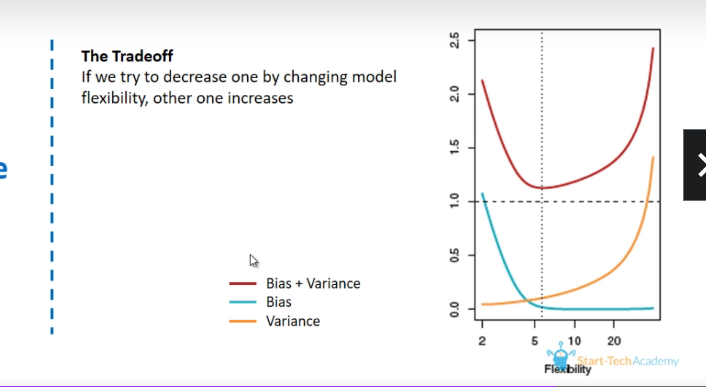

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.2, random_state = 0)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 17) (102, 17) (404,) (102,)


In [19]:
lm_a = LinearRegression()

In [20]:
lm_a.fit(X_train,y_train)

LinearRegression()

In [21]:
y_test_a = lm_a.predict(X_test)

In [22]:
y_train_a = lm_a.predict(X_train)

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_test, y_test_a)

0.5477312015565096

In [25]:
r2_score(y_train,y_train_a)

0.7576727280120721

## Other Linear models

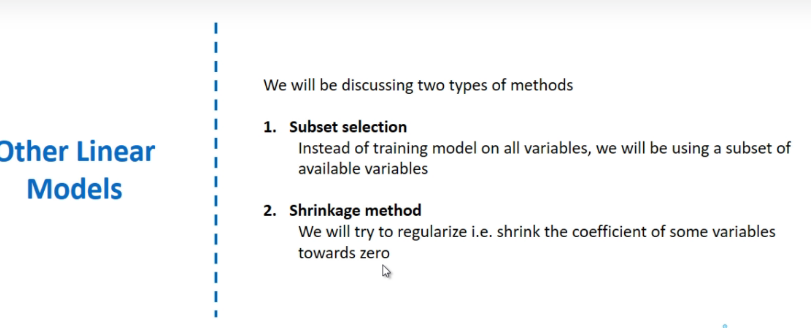

## Subset selection

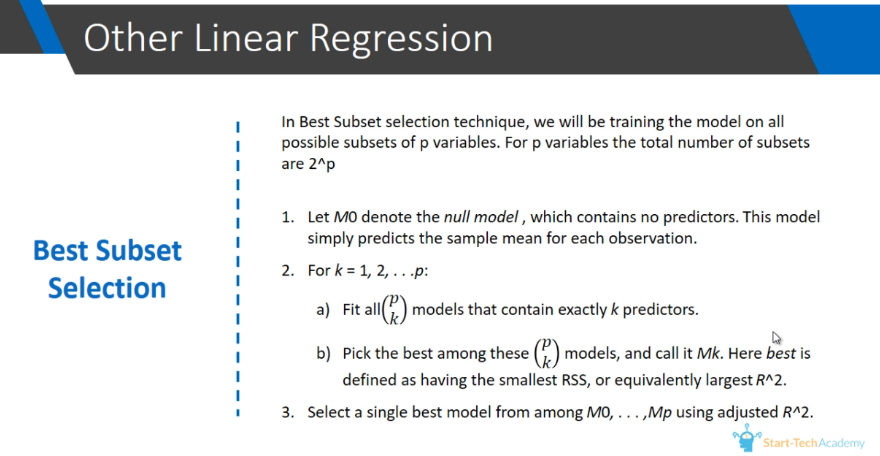

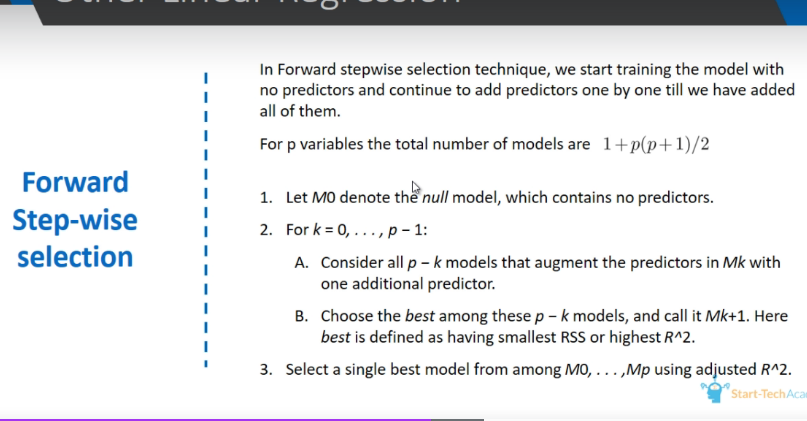

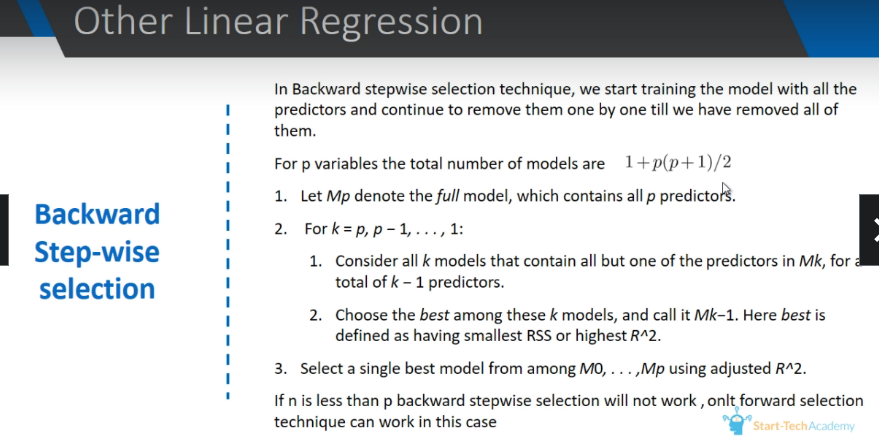

## Shrikage method

1. Ridge regression shrinks the coeff of all beta. But it doesnt sshrink to complete zero. It means it still use all variables
2. But lasso regression forces some of the coeff to be zero, therefore leaving out some variables from the regression.

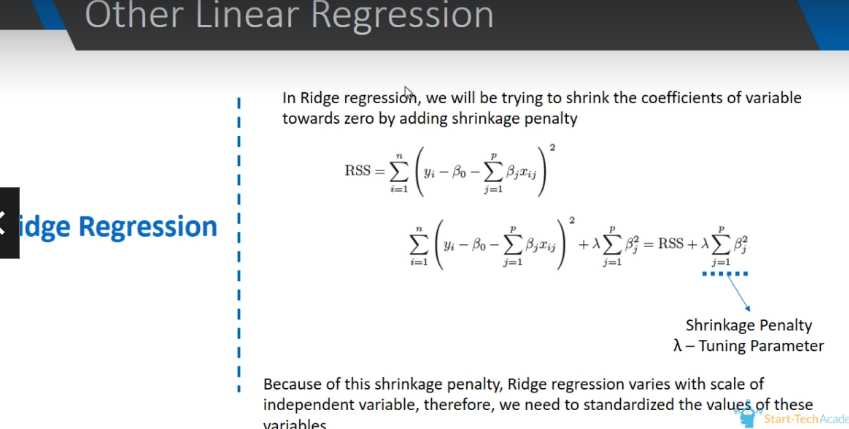

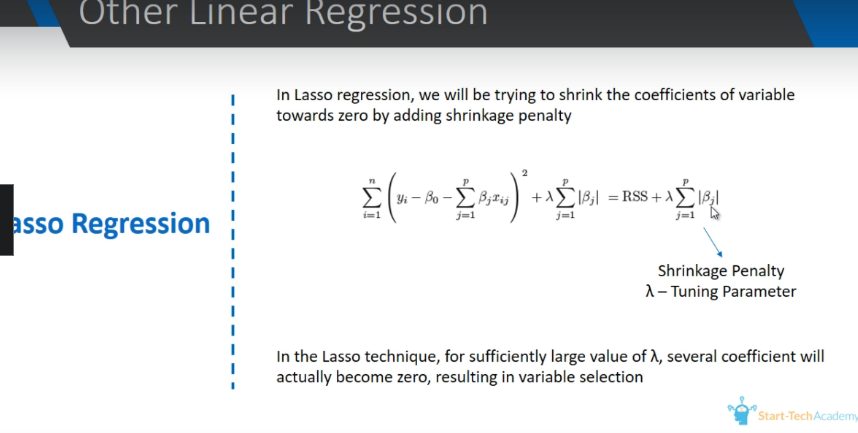

## Ridge regression

In [26]:
from sklearn import preprocessing

preprocessing.StandardScaler standardize features by removing the mean and scaling to unit variance.

fit here calculates the mean and variance of given variable

In [27]:
scaler = preprocessing.StandardScaler().fit(X_train)

transform()

Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.
In other words, it just applies the mean and variance calculated to every value to standarize the values.

In [28]:
X_train_s = scaler.transform(X_train)

In [29]:
X_test_s = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import Ridge

In [31]:
lm_r = Ridge(alpha=0.5)

In [32]:
lm_r.fit(X_train_s, y_train)

Ridge(alpha=0.5)

In [33]:
r2_score(y_test, lm_r.predict(X_test_s))

0.5475730530384304

Maximising the R2 score wrt alpha

In [34]:
from sklearn.model_selection import validation_curve

In [35]:
param_range = np.logspace(-2,8,100)

In [36]:
train_scores_R, test_scores_R = validation_curve(Ridge(),
                                              X_train_s,
                                              y_train,
                                              param_name="alpha",
                                              param_range = param_range,
                                              scoring ="r2")

In [39]:
print(train_scores_R)
print(test_scores_R)

[[7.51046336e-01 7.64181836e-01 7.54207433e-01 7.82551610e-01
  7.47638561e-01]
 [7.51046335e-01 7.64181834e-01 7.54207432e-01 7.82551609e-01
  7.47638559e-01]
 [7.51046333e-01 7.64181833e-01 7.54207430e-01 7.82551608e-01
  7.47638558e-01]
 [7.51046330e-01 7.64181830e-01 7.54207428e-01 7.82551606e-01
  7.47638555e-01]
 [7.51046325e-01 7.64181825e-01 7.54207424e-01 7.82551604e-01
  7.47638551e-01]
 [7.51046316e-01 7.64181817e-01 7.54207417e-01 7.82551600e-01
  7.47638544e-01]
 [7.51046303e-01 7.64181805e-01 7.54207407e-01 7.82551593e-01
  7.47638533e-01]
 [7.51046283e-01 7.64181786e-01 7.54207392e-01 7.82551583e-01
  7.47638516e-01]
 [7.51046250e-01 7.64181755e-01 7.54207366e-01 7.82551567e-01
  7.47638488e-01]
 [7.51046197e-01 7.64181706e-01 7.54207326e-01 7.82551541e-01
  7.47638445e-01]
 [7.51046113e-01 7.64181629e-01 7.54207263e-01 7.82551500e-01
  7.47638375e-01]
 [7.51045981e-01 7.64181506e-01 7.54207162e-01 7.82551434e-01
  7.47638265e-01]
 [7.51045770e-01 7.64181311e-01 7.542070

In [40]:
train_mean_R = np.mean(train_scores_R, axis =1)

In [41]:
test_mean_R = np.mean(test_scores_R, axis=1)

In [42]:
train_mean_R

array([7.59925155e-01, 7.59925154e-01, 7.59925152e-01, 7.59925150e-01,
       7.59925146e-01, 7.59925139e-01, 7.59925128e-01, 7.59925112e-01,
       7.59925085e-01, 7.59925043e-01, 7.59924976e-01, 7.59924870e-01,
       7.59924701e-01, 7.59924433e-01, 7.59924008e-01, 7.59923336e-01,
       7.59922275e-01, 7.59920602e-01, 7.59917971e-01, 7.59913846e-01,
       7.59907404e-01, 7.59897389e-01, 7.59881910e-01, 7.59858149e-01,
       7.59821973e-01, 7.59767427e-01, 7.59686092e-01, 7.59566331e-01,
       7.59392407e-01, 7.59143488e-01, 7.58792466e-01, 7.58304415e-01,
       7.57634355e-01, 7.56723882e-01, 7.55496174e-01, 7.53849120e-01,
       7.51646646e-01, 7.48708818e-01, 7.44801966e-01, 7.39630895e-01,
       7.32836433e-01, 7.24002606e-01, 7.12677811e-01, 6.98412100e-01,
       6.80807600e-01, 6.59572365e-01, 6.34563293e-01, 6.05805624e-01,
       5.73486328e-01, 5.37931860e-01, 4.99588366e-01, 4.59017392e-01,
       4.16904355e-01, 3.74061361e-01, 3.31402379e-01, 2.89881016e-01,
      

Its a array of R2 scores for 100 alphas

In [43]:
max(test_mean_R)

0.7378235177833671

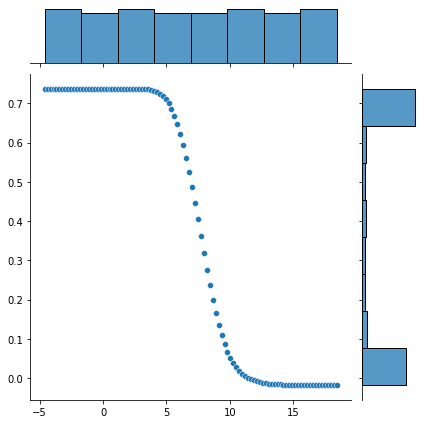

In [44]:
sns.jointplot(x=np.log(param_range),
             y=test_mean_R)

In [45]:
np.where(test_mean_R == max(test_mean_R))

(array([30], dtype=int64),)

In [46]:
param_range[30]

10.722672220103231

In [47]:
lm_r_best = Ridge(alpha=param_range[30])

In [48]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=10.722672220103231)

In [49]:
r2_score(y_test, lm_r_best.predict(X_test_s))

0.5438776990065177

In [50]:
r2_score(y_train, lm_r_best.predict(X_train_s))

0.7568983820452584

## Lasso regression

In [51]:
from sklearn.linear_model import Lasso

In [52]:
lm_l = Lasso(alpha = 0.4)

In [53]:
train_scores_L, test_scores_L = validation_curve(Lasso(),
                                              X_train_s,
                                              y_train,
                                              param_name="alpha",
                                              param_range = param_range,
                                              scoring ="r2")

In [54]:
train_mean_L = np.mean(train_scores_L, axis =1)

In [55]:
test_mean_L = np.mean(test_scores_L, axis=1)

In [56]:
max(test_mean_L)

0.7383703808395486

In [57]:
np.where(test_mean_L == max(test_mean_L))

(array([8], dtype=int64),)

In [58]:
param_range[8]

0.06428073117284319

In [59]:
lm_l_best = Lasso(alpha = param_range[8])

In [60]:
lm_l_best.fit(X_train_s,y_train)

Lasso(alpha=0.06428073117284319)

In [61]:
r2_score(y_test, lm_l_best.predict(X_test_s))

0.5477757107581969

In [62]:
r2_score(y_train, lm_l_best.predict(X_train_s))

0.7556435667282362

## Heteroscedasticity

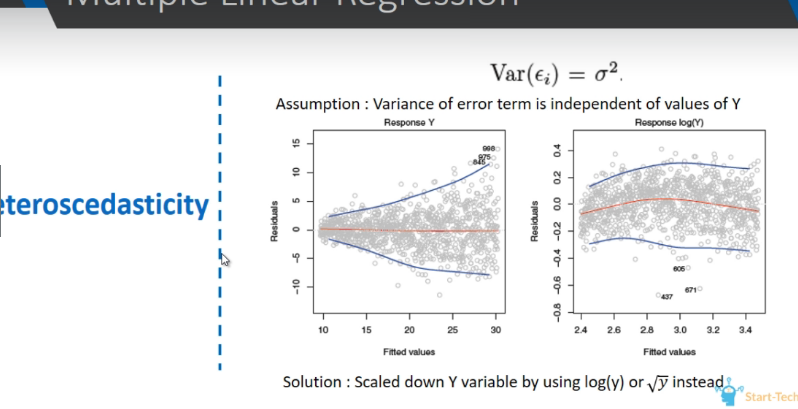

## Linear regression cant be used when